In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pytz import timezone
import pytz
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [20, 12]}, font_scale=1.2)

In [4]:
df= pd.read_csv(r"D:\Egypt Housing Prices\Egypt Housing Prices\houses_data_v2.csv")
df

,House_Type,Size,Bedrooms,Bathrooms,Floor,Furnished,For_rent,Region,City,Price
0,Apartment,170,3,2,9,No,No,Zahraa Al Maadi,Cairo,1546400
1,Apartment,104,2,1,7,No,No,Nasr City,Cairo,950000
2,Apartment,160,3,2,1,No,No,Mostakbal City,Cairo,2100000
3,Apartment,160,3,3,Ground,No,No,New Cairo - El Tagamoa,Cairo,3994232
4,Apartment,145,3,2,3,No,No,New Cairo - El Tagamoa,Cairo,370000
...,...,...,...,...,...,...,...,...,...,...
23342,Apartment,134,2,2,1,No,Yes,Shorouk City,Cairo,9000
23343,Duplex,176,3,3,Ground,No,Yes,Shorouk City,Cairo,15000
23344,Apartment,70,2,1,Ground,Yes,Yes,Obour City,Cairo,3500
23345,Apartment,115,3,1,2,No,Yes,Obour City,Cairo,2800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23347 entries, 0 to 23346
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   House_Type  23347 non-null  object
 1   Size        23347 non-null  int64 
 2   Bedrooms    23347 non-null  int64 
 3   Bathrooms   23347 non-null  int64 
 4   Floor       23347 non-null  object
 5   Furnished   23347 non-null  object
 6   For_rent    23347 non-null  object
 7   Region      23347 non-null  object
 8   City        23347 non-null  object
 9   Price       23347 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 1.8+ MB


In [6]:
for col in df.columns:
    print(col+ '\n------------')
    print(df[col].value_counts())
    print('------------'*2)

House_Type
------------
House_Type
Apartment            19150
Duplex                1255
Town House             888
Stand Alone Villa      570
Penthouse              496
Studio                 448
Twin House             304
Chalet                 210
Room                    22
Standalone Villa         4
Name: count, dtype: int64
------------------------
Size
------------
Size
200    881
150    771
140    744
160    715
120    712
      ... 
8        1
51       1
348      1
362      1
396      1
Name: count, Length: 368, dtype: int64
------------------------
Bedrooms
------------
Bedrooms
3    14030
2     5690
4     2508
1      744
5      375
Name: count, dtype: int64
------------------------
Bathrooms
------------
Bathrooms
2    9678
3    7628
1    4773
4    1268
Name: count, dtype: int64
------------------------
Floor
------------
Floor
2          7334
3          5070
1          3455
Ground     2645
4          2052
5          1057
6           392
10+         329
7           285
10    

In [7]:
df.describe()

,Size,Bedrooms,Bathrooms,Price
count,23347.000000,23347.000000,23347.000000,2.334700e+04
mean,170.380349,2.832098,2.230908,1.374141e+06
std,64.273958,0.717415,0.833736,1.412544e+06
min,1.000000,1.000000,1.000000,2.000000e+03
25%,130.000000,2.000000,2.000000,2.200000e+04
50%,160.000000,3.000000,2.000000,9.500000e+05
75%,200.000000,3.000000,3.000000,2.400000e+06
max,400.000000,5.000000,4.000000,5.000000e+06


In [8]:
def encode_floor(floor):
    if floor == 'Ground':
        floor = 0
    if floor == '10+':
        floor = 11
    if floor == 'Highest':
        floor = 12
    return int(floor)

df['Floor'] = df['Floor'].apply(encode_floor)

In [9]:
df

,House_Type,Size,Bedrooms,Bathrooms,Floor,Furnished,For_rent,Region,City,Price
0,Apartment,170,3,2,9,No,No,Zahraa Al Maadi,Cairo,1546400
1,Apartment,104,2,1,7,No,No,Nasr City,Cairo,950000
2,Apartment,160,3,2,1,No,No,Mostakbal City,Cairo,2100000
3,Apartment,160,3,3,0,No,No,New Cairo - El Tagamoa,Cairo,3994232
4,Apartment,145,3,2,3,No,No,New Cairo - El Tagamoa,Cairo,370000
...,...,...,...,...,...,...,...,...,...,...
23342,Apartment,134,2,2,1,No,Yes,Shorouk City,Cairo,9000
23343,Duplex,176,3,3,0,No,Yes,Shorouk City,Cairo,15000
23344,Apartment,70,2,1,0,Yes,Yes,Obour City,Cairo,3500
23345,Apartment,115,3,1,2,No,Yes,Obour City,Cairo,2800


In [11]:
df.isnull().sum()

House_Type    0
Size          0
Bedrooms      0
Bathrooms     0
Floor         0
Furnished     0
For_rent      0
Region        0
City          0
Price         0
dtype: int64

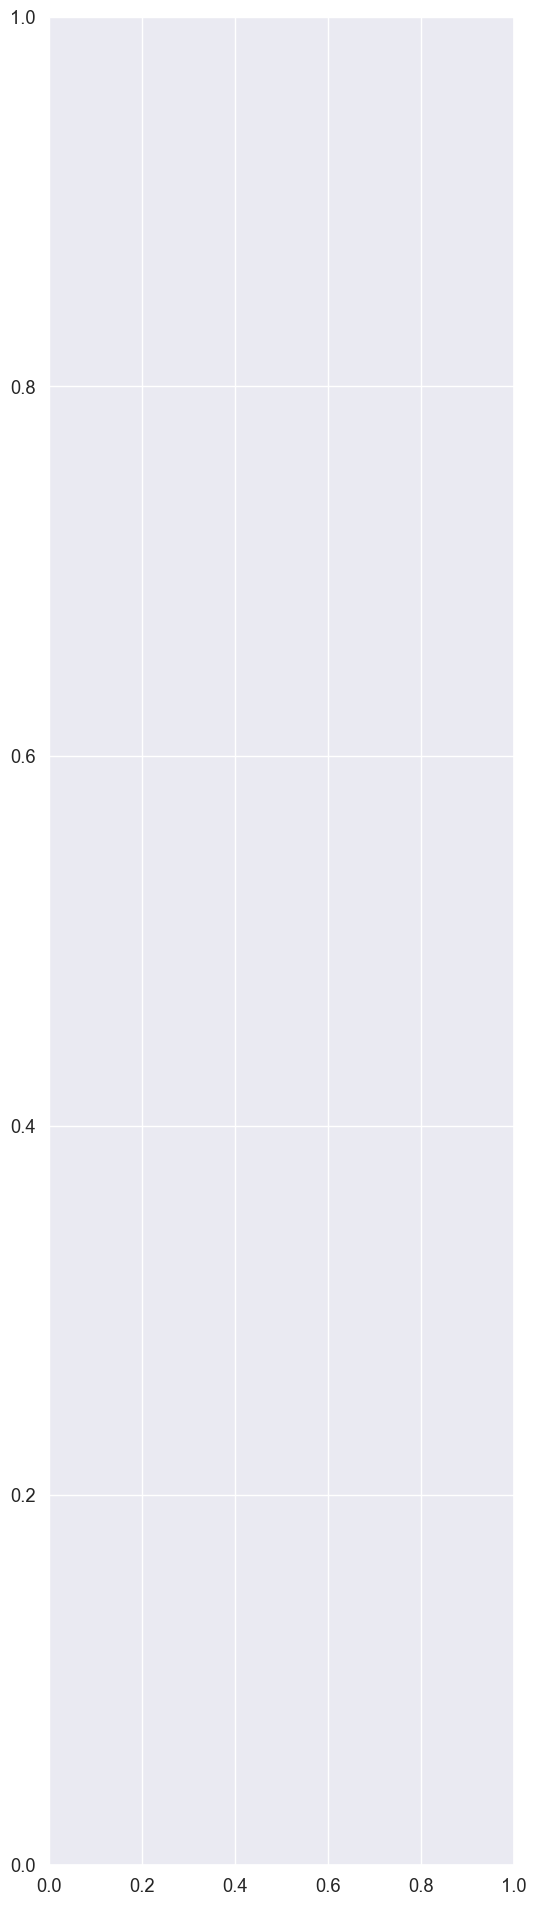

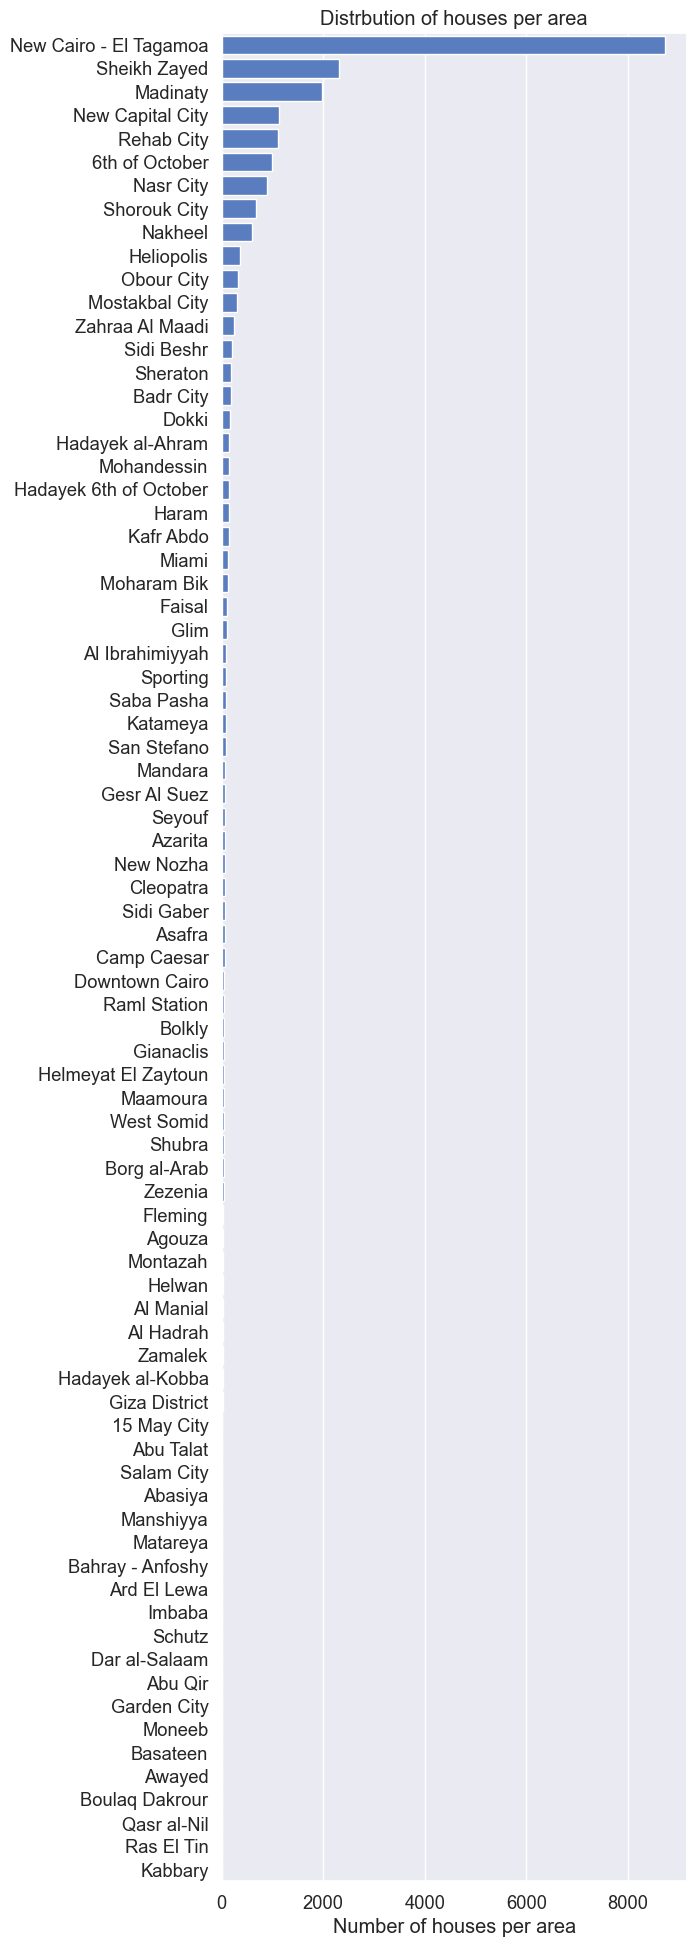

In [22]:
fig, axes = plt.subplots(figsize=(6,24))
sns.set_color_codes('muted')
ax = sns.barplot(
    x=df['Region'].value_counts(ascending=False).values,
    y=df['Region'].value_counts(ascending=False).index,
    color='b',
    width=0.8,
)
plt.xlabel('Number of houses per area')
plt.ylabel('')
plt.title('Distrbution of houses per area')
plt.show()

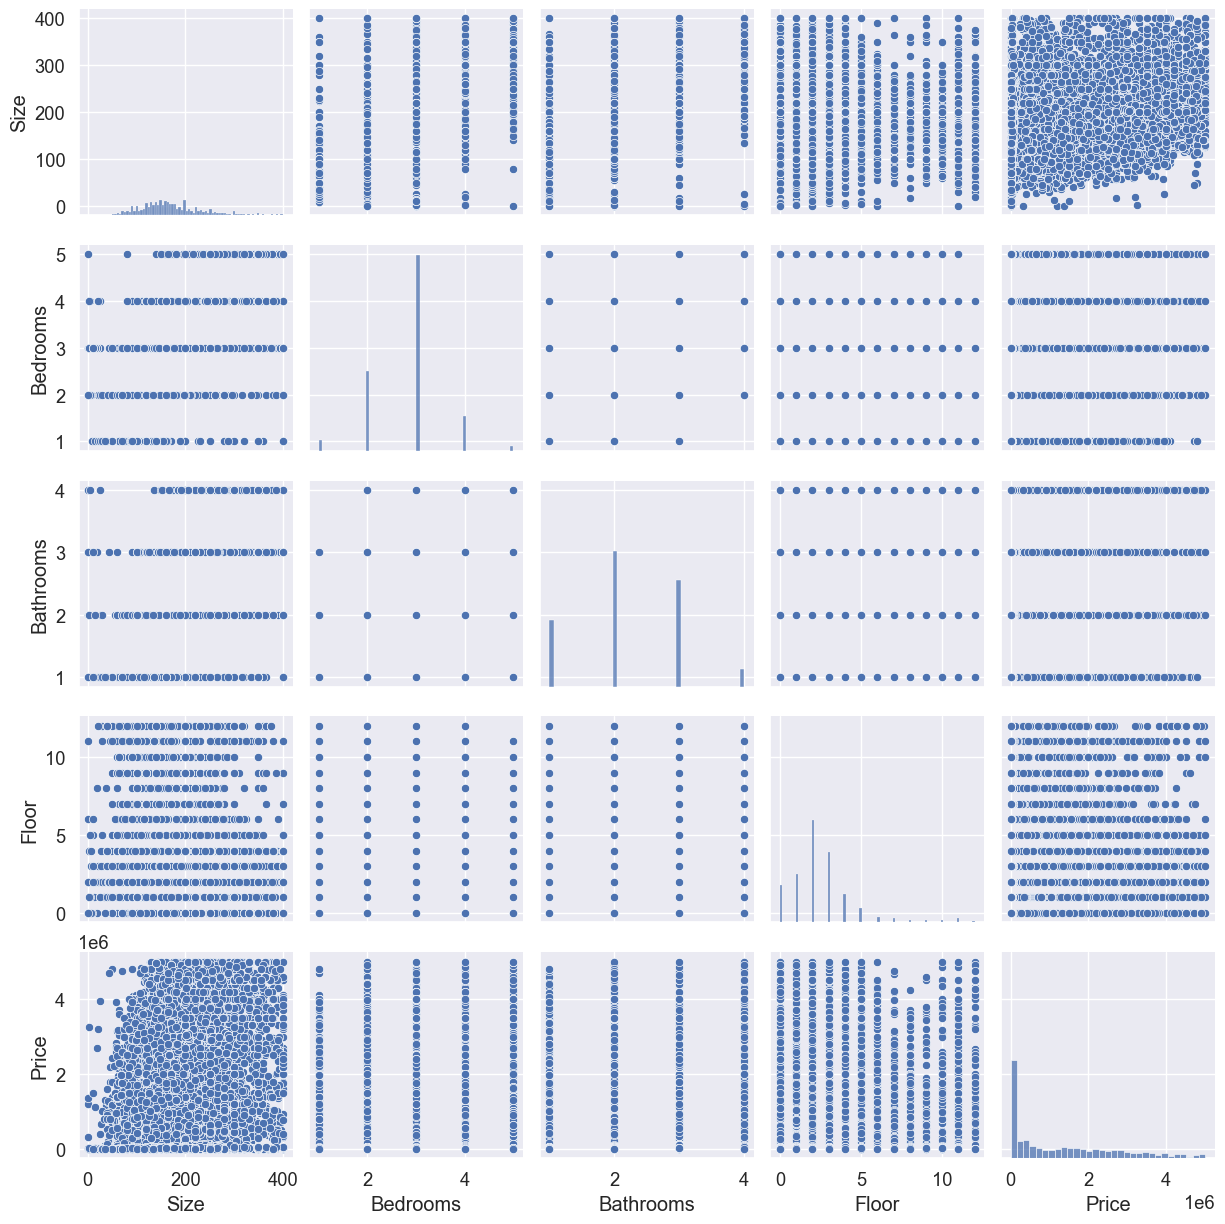

In [13]:
sns.pairplot(df)
plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

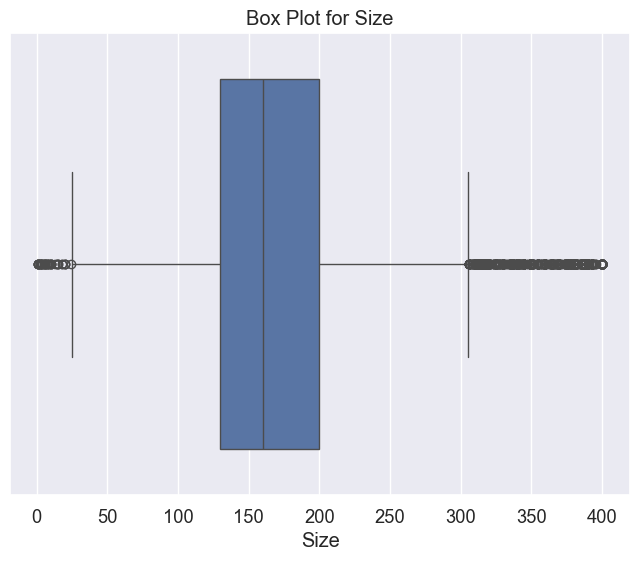

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Size'])
plt.title('Box Plot for Size')
plt.xlabel('Size')
plt.show()

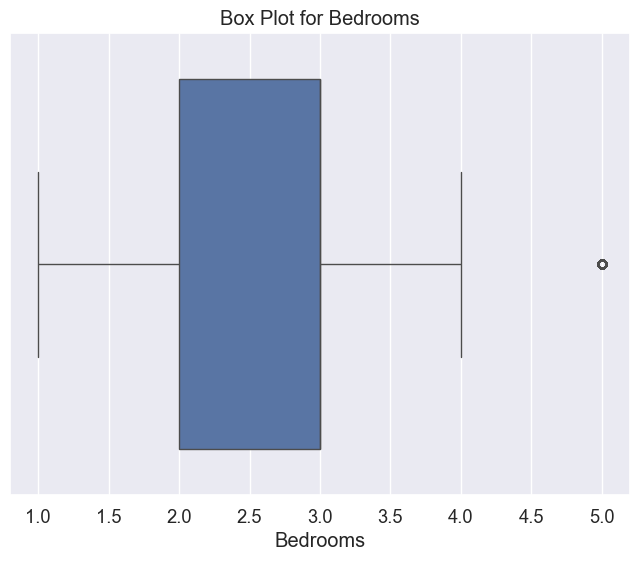

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Bedrooms'])
plt.title('Box Plot for Bedrooms')
plt.xlabel('Bedrooms')
plt.show()

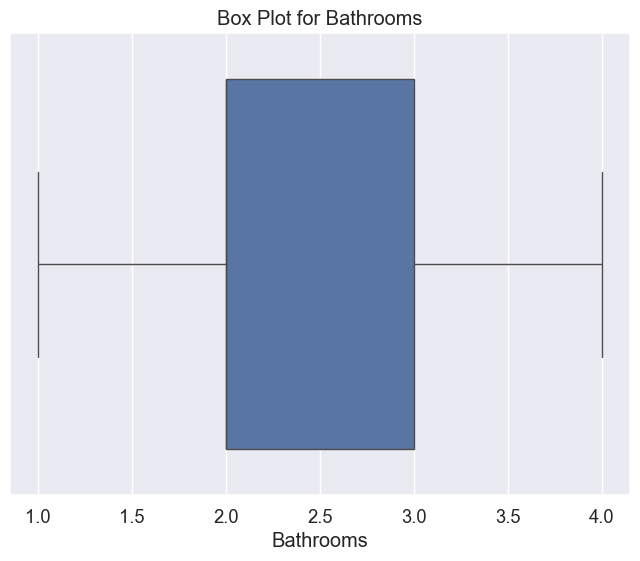

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Bathrooms'])
plt.title('Box Plot for Bathrooms')
plt.xlabel('Bathrooms')
plt.show()

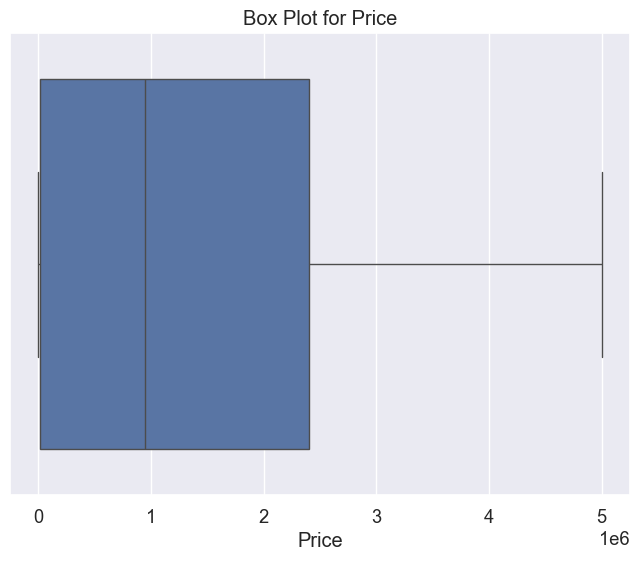

In [20]:
# Box plot for 'Price' to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot for Price')
plt.xlabel('Price')
plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

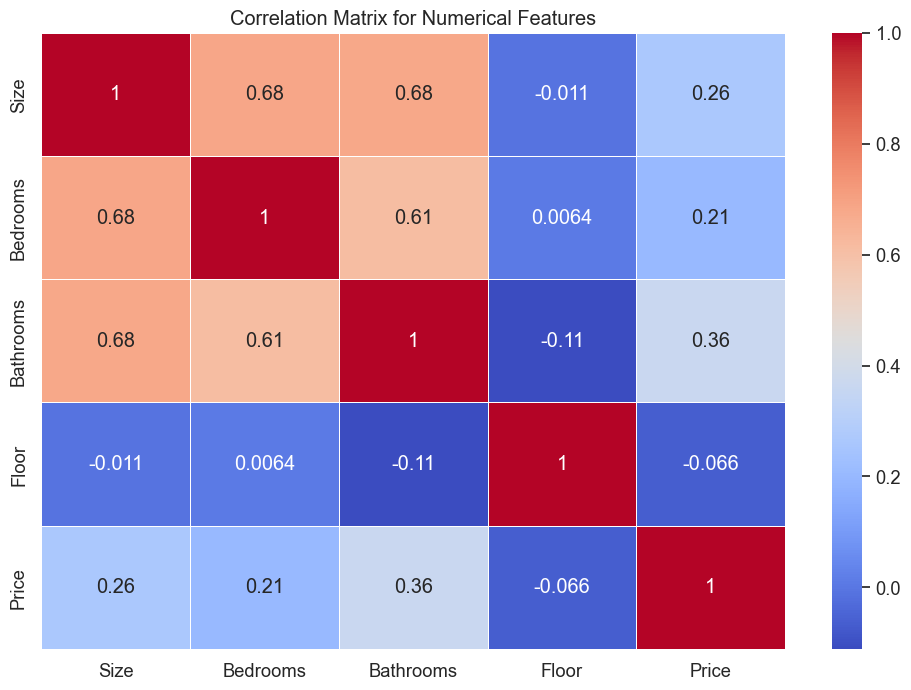

In [25]:
plt.figure(figsize=(12, 8))
correlation = df.select_dtypes(include='number').corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [26]:
df_no_outliers = df.copy()

for col in df_no_outliers.select_dtypes(include='number'):
    mean = df_no_outliers[col].mean()
    std = df_no_outliers[col].std()
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= mean - 3*std) & (df_no_outliers[col] <= mean + 3*std)]

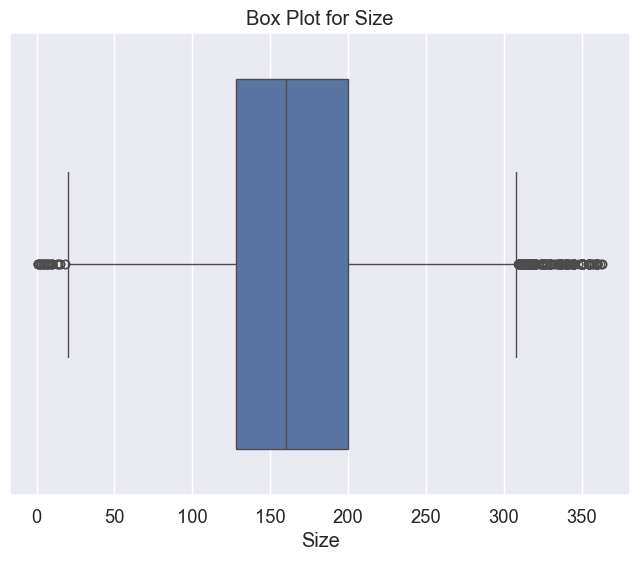

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Size'])
plt.title('Box Plot for Size')
plt.xlabel('Size')
plt.show()

In [29]:
from scipy.stats import zscore

df_numeric = df_no_outliers.select_dtypes(include='number')
z_scores = np.abs(zscore(df_numeric))

# الاحتفاظ بالصفوف التي تحتوي على Z-score أقل من 3 في كل الأعمدة
df_no_outliers = df_no_outliers[(z_scores < 3).all(axis=1)]

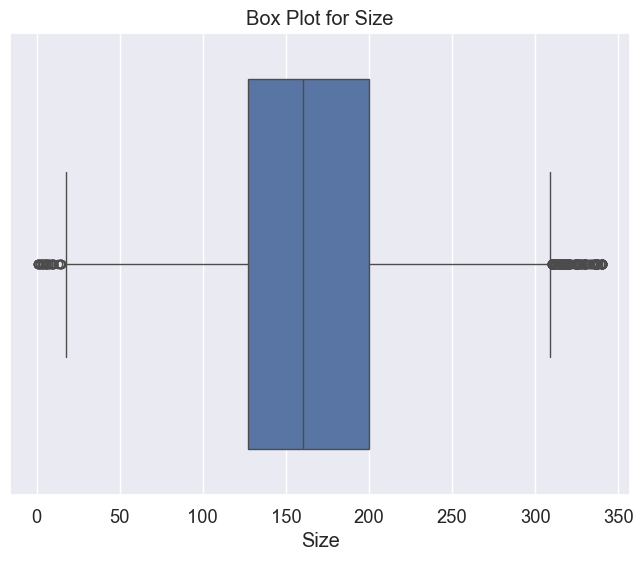

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['Size'])
plt.title('Box Plot for Size')
plt.xlabel('Size')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
# 3. إزالة القيم المتطرفة في السعر
Q1 = df_no_outliers['Price'].quantile(0.25)
Q3 = df_no_outliers['Price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_no_outliers[(df_no_outliers['Price'] >= Q1 - 1.5 * IQR) & (df_no_outliers['Price'] <= Q3 + 1.5 * IQR)]

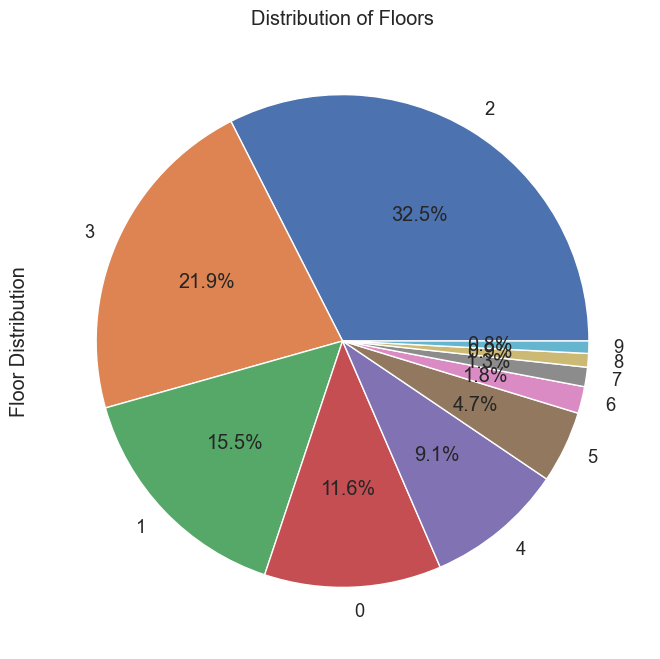

In [74]:
# Pie chart of floor distribution
floor_counts = df_no_outliers['Floor'].value_counts()

# Plot the pie chart
floor_counts.plot.pie(figsize=(8, 8), autopct='%1.1f%%', title='Distribution of Floors')

# Show the plot
plt.ylabel('Floor Distribution')  # Remove the default y-label
plt.show()

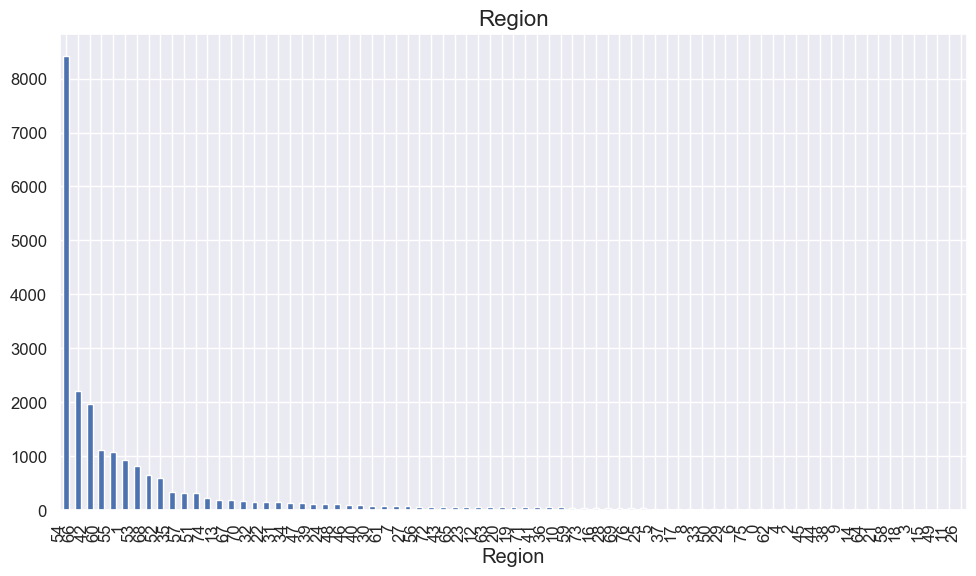

In [75]:
# Set the figure size (width, height)
plt.figure(figsize=(10, 6))

# Create the bar plot
Region = df_no_outliers['Region'].value_counts()
Region.plot(kind='bar')

# Add title, rotate x-axis labels, and adjust font size
plt.title('Region', fontsize=16)  # Increase title font size
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate x-axis labels by 45 degrees, align them to the right, and increase font size
plt.yticks(fontsize=12)  # Increase y-axis labels font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Display the plot
plt.show()

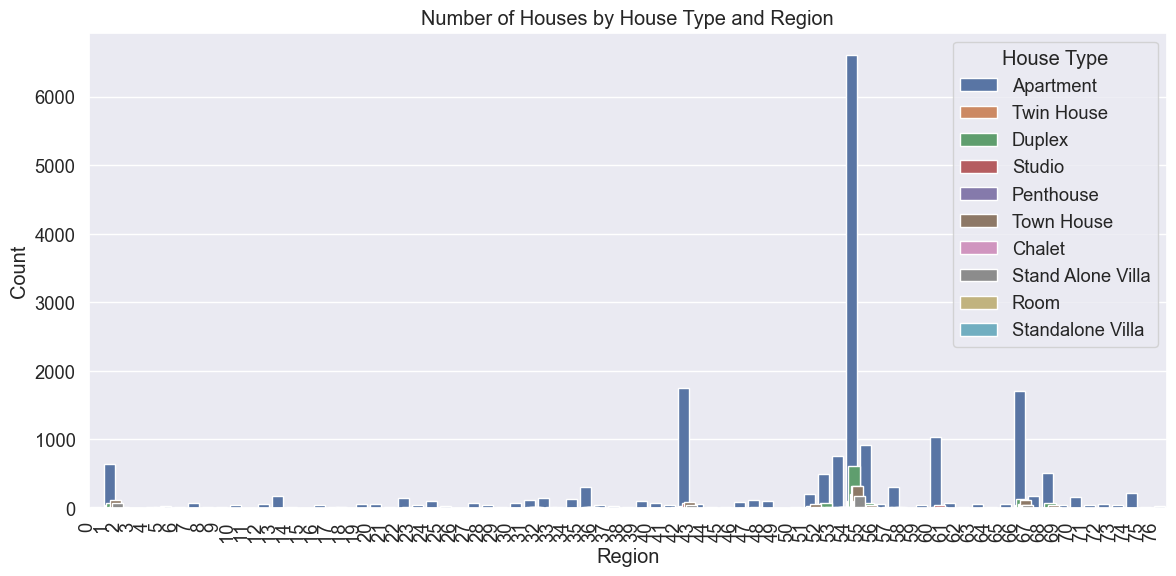

In [76]:
# Create the countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_no_outliers, x='Region', hue='House_Type')

# Increase the width of the bars
for patch in ax.patches:
    patch.set_width(0.8)  # Adjust width as needed

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Houses by House Type and Region')

# Rotate x-axis labels
plt.xticks(rotation=90, ha='right')  # Rotate labels by 90 degrees, align to the right

# Show the plot
plt.legend(title='House Type')
plt.tight_layout()
plt.show()


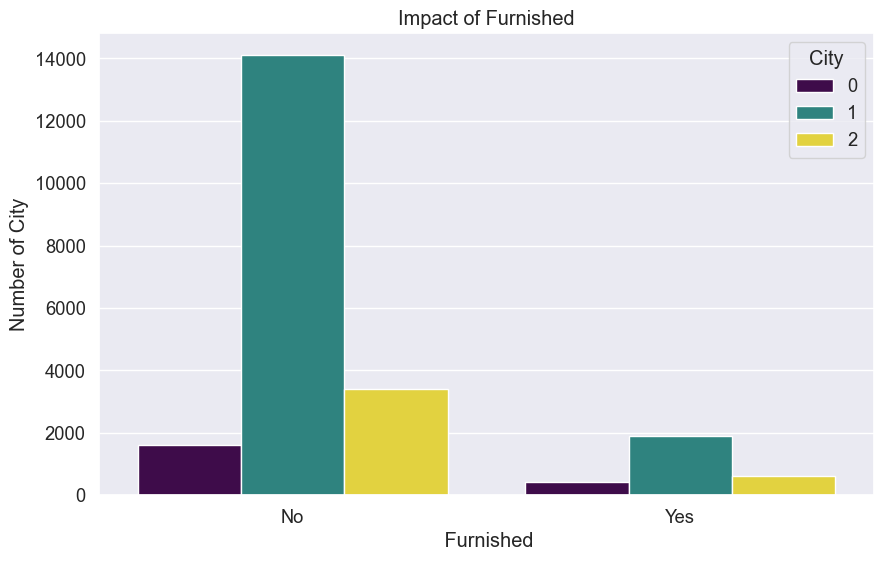

In [77]:
# Analyzing the effect of 'Furnished' on 'City'
plt.figure(figsize=(10, 6))
sns.countplot(x='Furnished', hue='City', data=df_no_outliers, palette='viridis')
plt.title('Impact of Furnished')
plt.xlabel(' Furnished')
plt.ylabel('Number of City')
plt.show()

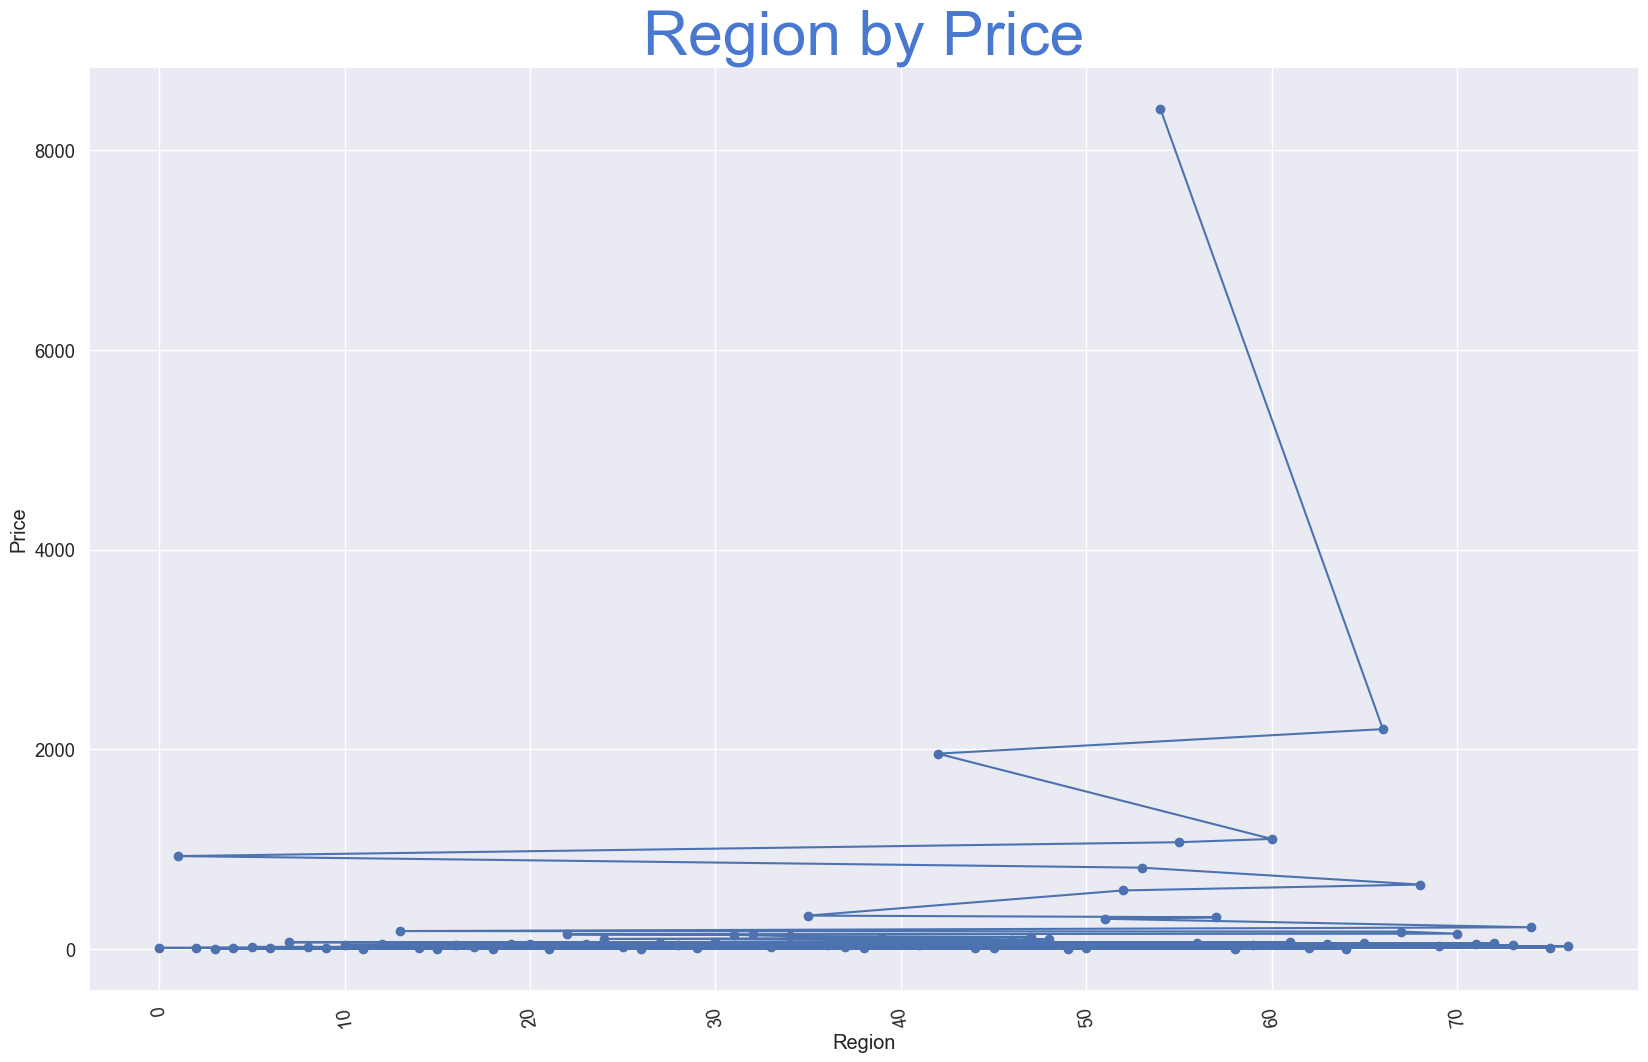

In [78]:
Region=df_no_outliers['Region'].value_counts()
plt.plot(Region,'o-')
plt.xticks(rotation=45)
plt.title("Region by Price",fontsize=45,color='b'),plt.xticks(rotation=100)
plt.xlabel("Region")
plt.ylabel("Price")
plt.show()

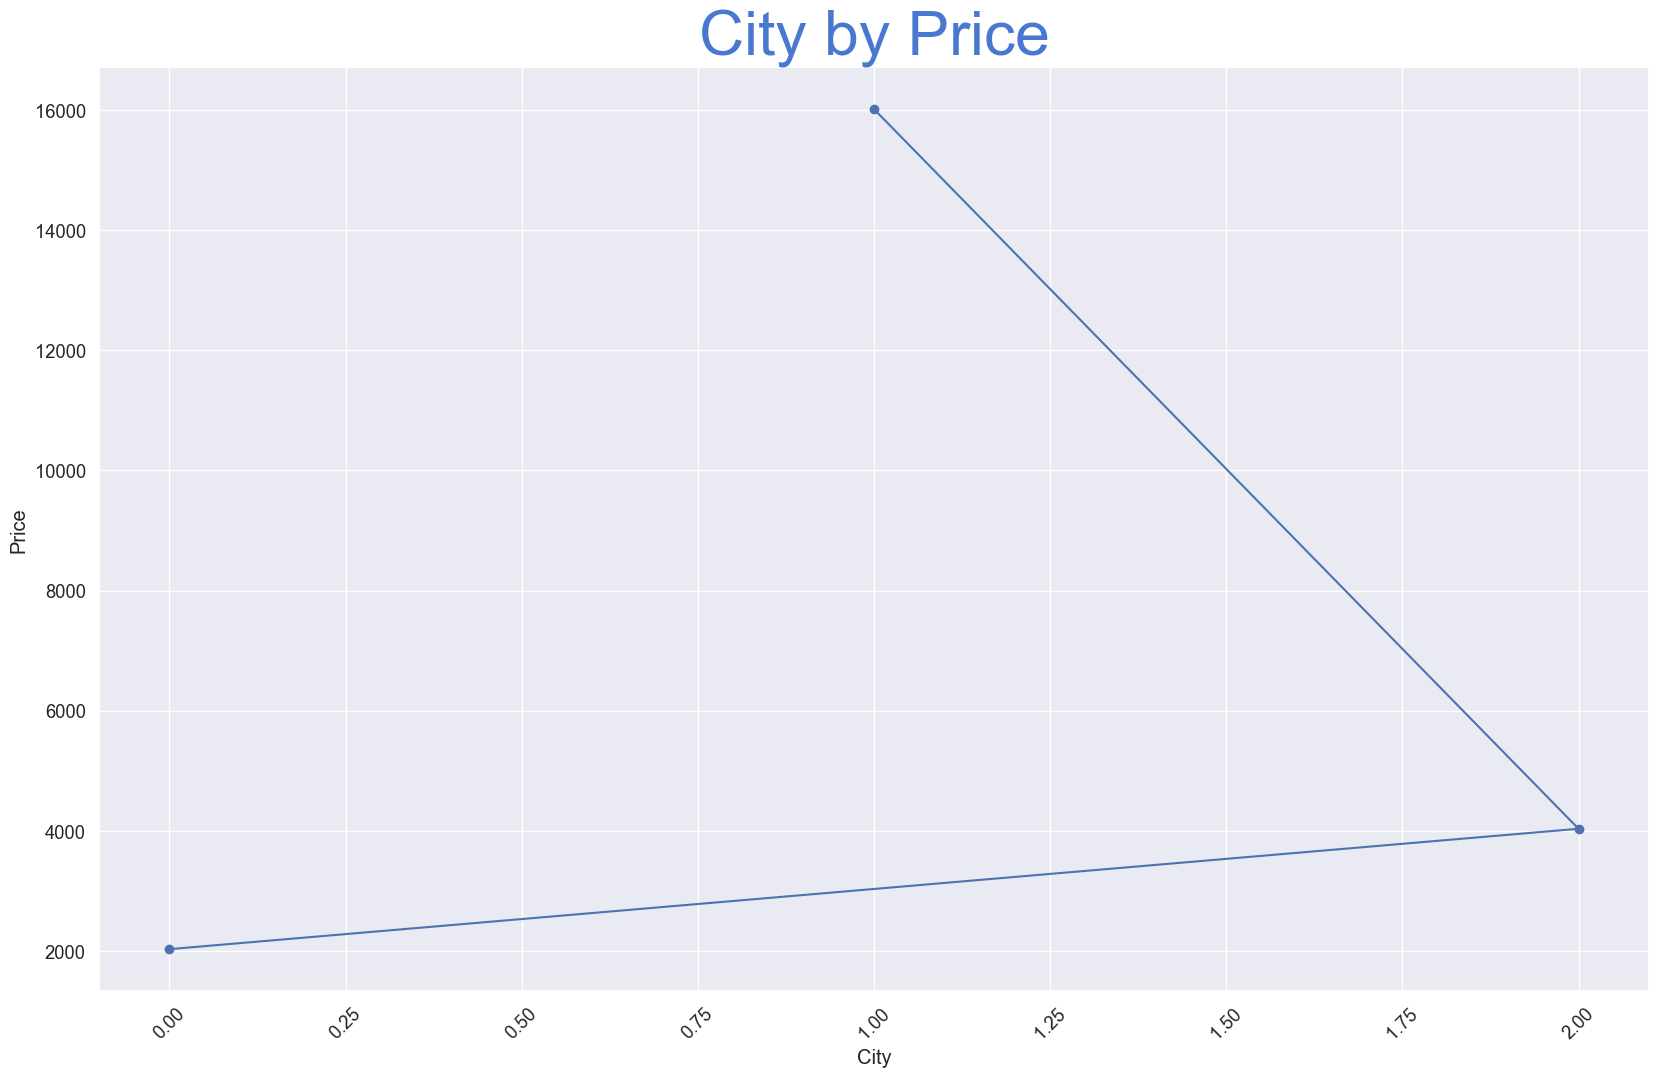

In [79]:
City=df_no_outliers['City'].value_counts()
plt.plot(City,'o-')
plt.xticks(rotation=45)
plt.title("City by Price",fontsize=45,color='b')
plt.xlabel("City")
plt.ylabel("Price")
plt.show()

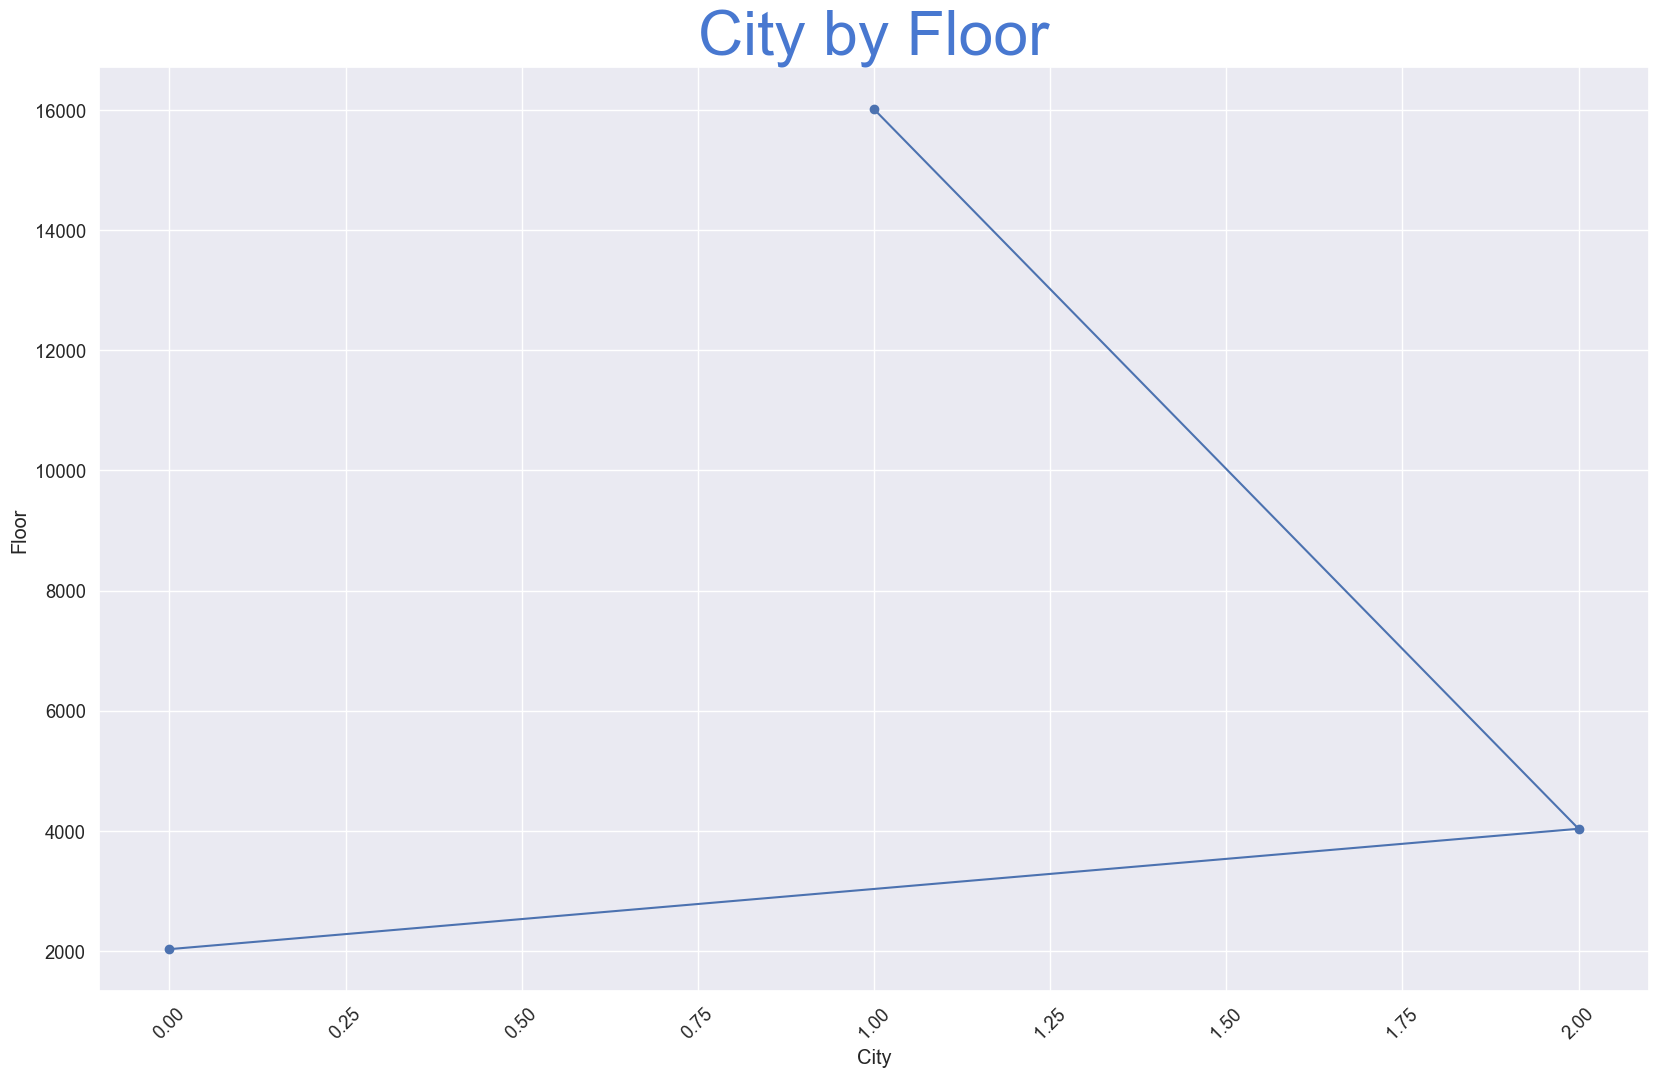

In [80]:
City=df_no_outliers['City'].value_counts()
plt.plot(City,'o-')
plt.xticks(rotation=45)
plt.title("City by Floor",fontsize=45,color='b')
plt.xlabel("City")
plt.ylabel("Floor")
plt.show()

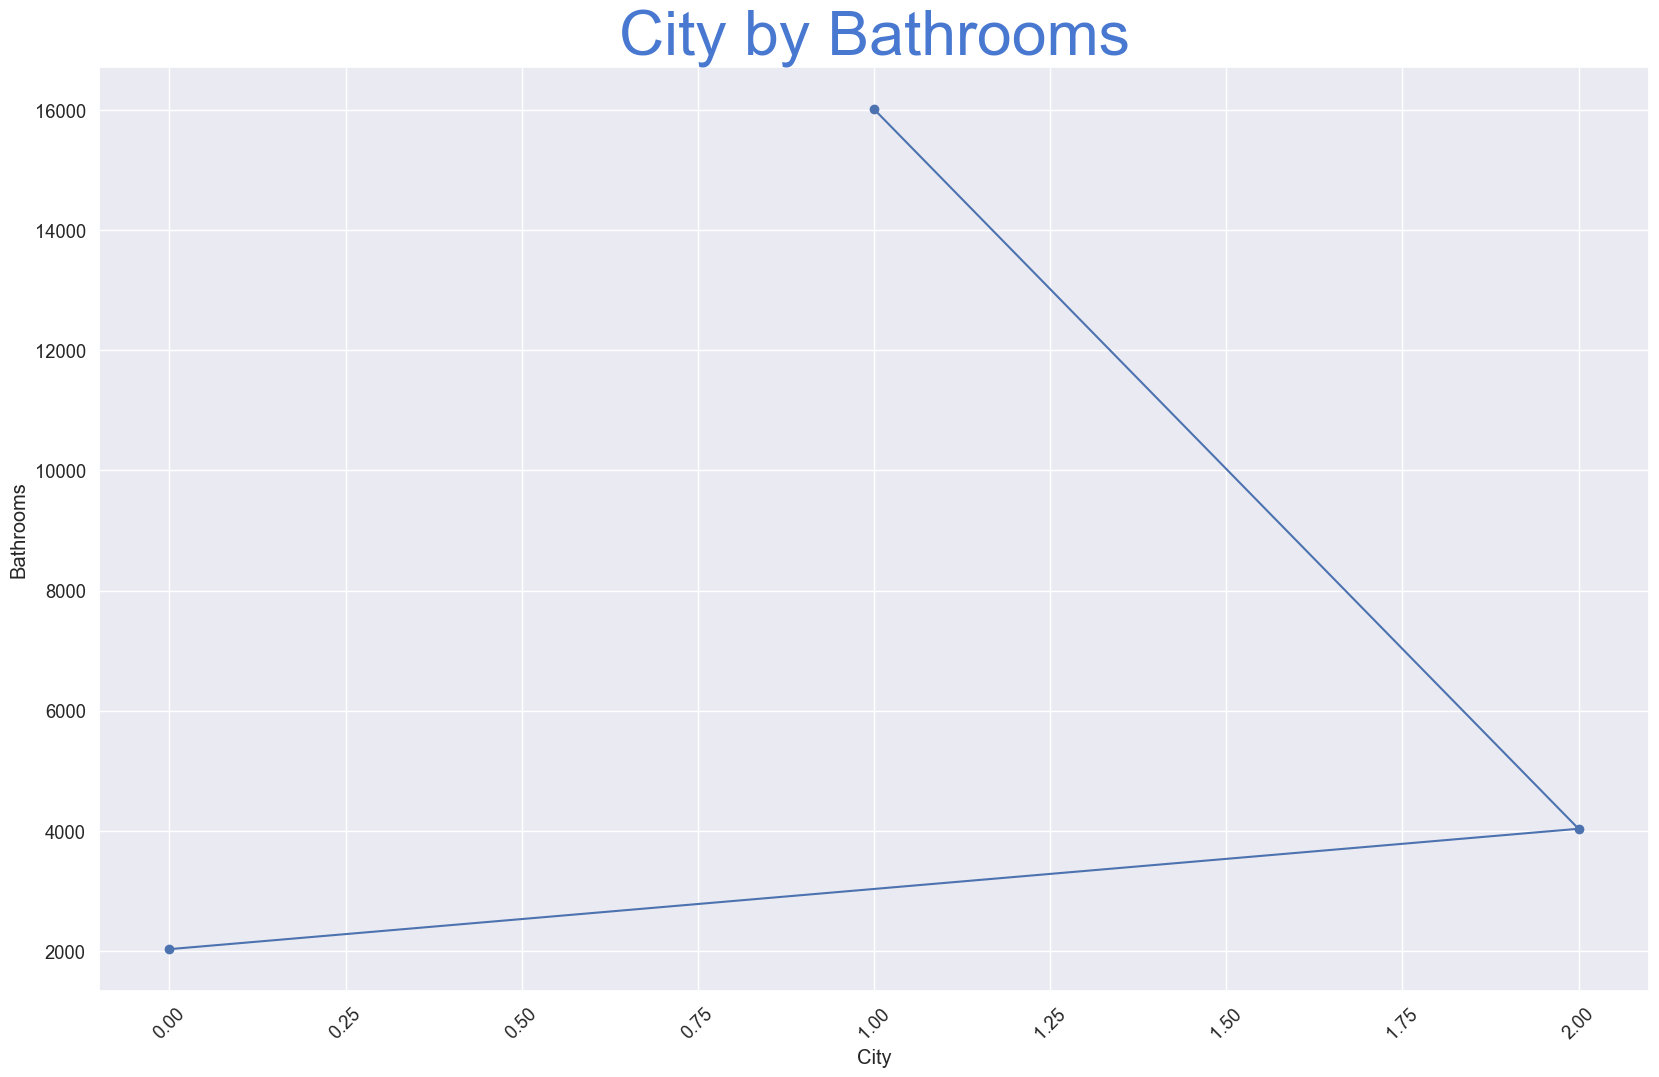

In [81]:
City=df_no_outliers['City'].value_counts()
plt.plot(City,'o-')
plt.xticks(rotation=45)
plt.title("City by Bathrooms",fontsize=45,color='b')
plt.xlabel("City")
plt.ylabel("Bathrooms")
plt.show()

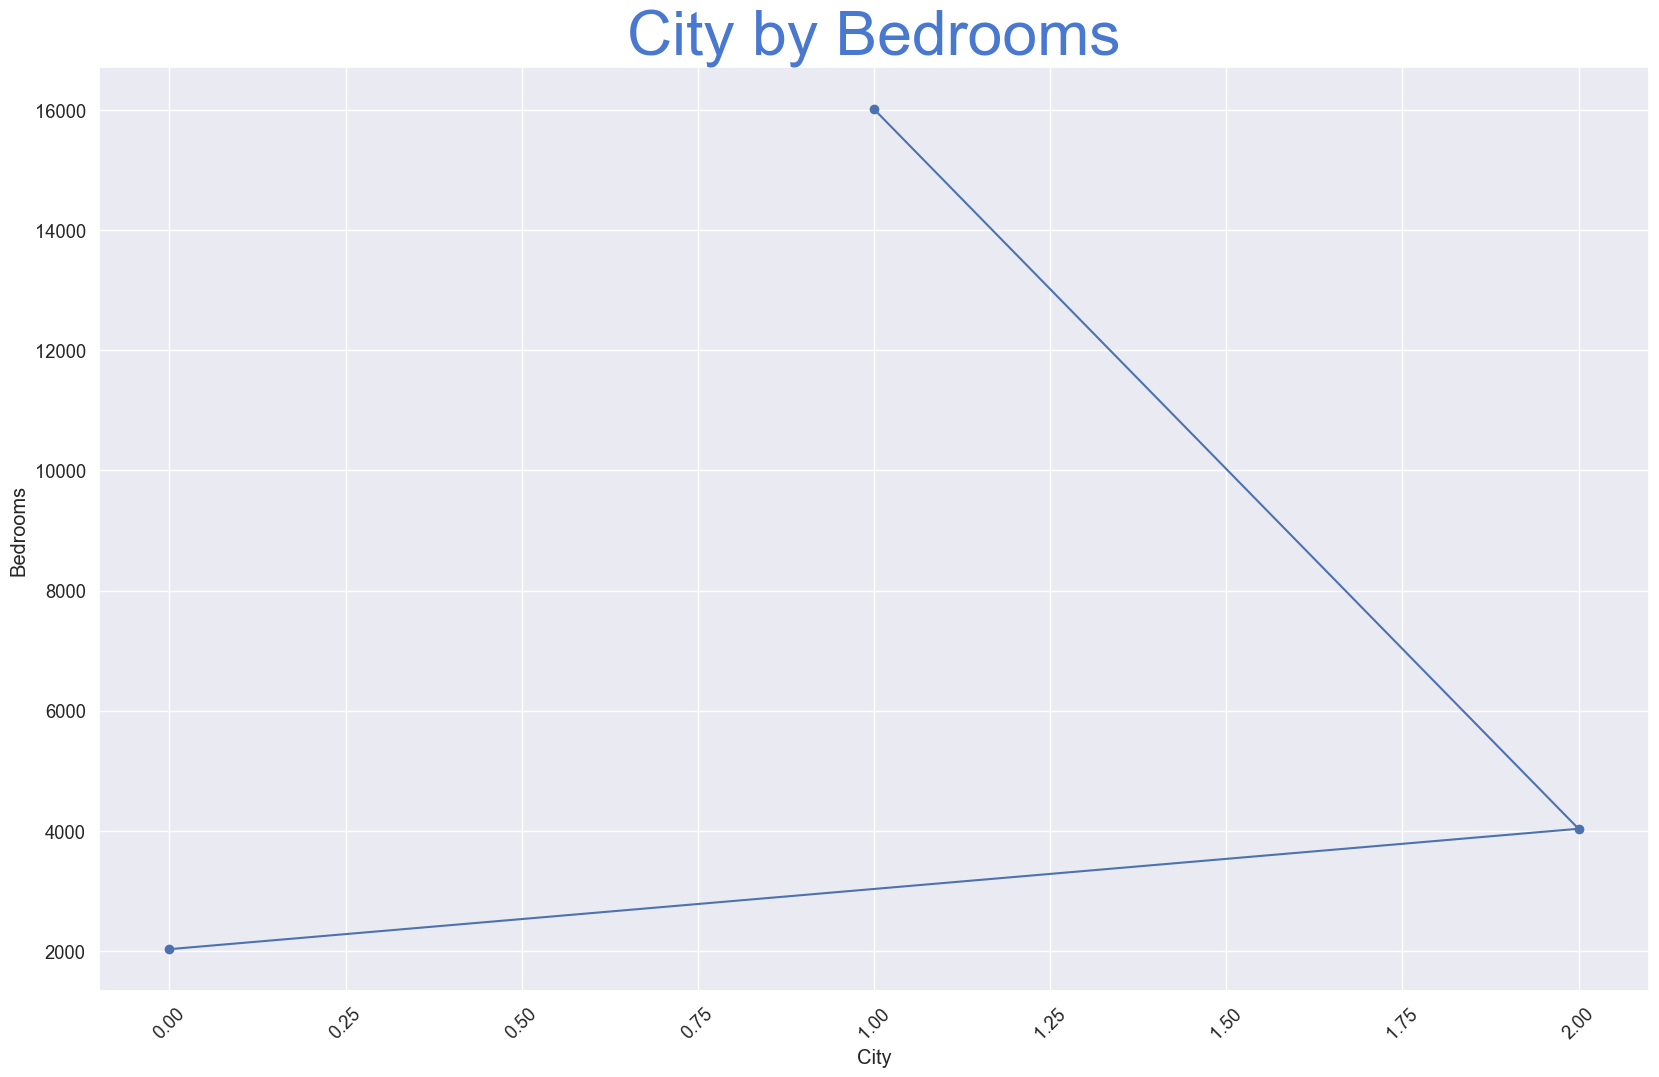

In [82]:
City=df_no_outliers['City'].value_counts()
plt.plot(City,'o-')
plt.xticks(rotation=45)
plt.title("City by Bedrooms",fontsize=45,color='b')
plt.xlabel("City")
plt.ylabel("Bedrooms")
plt.show()

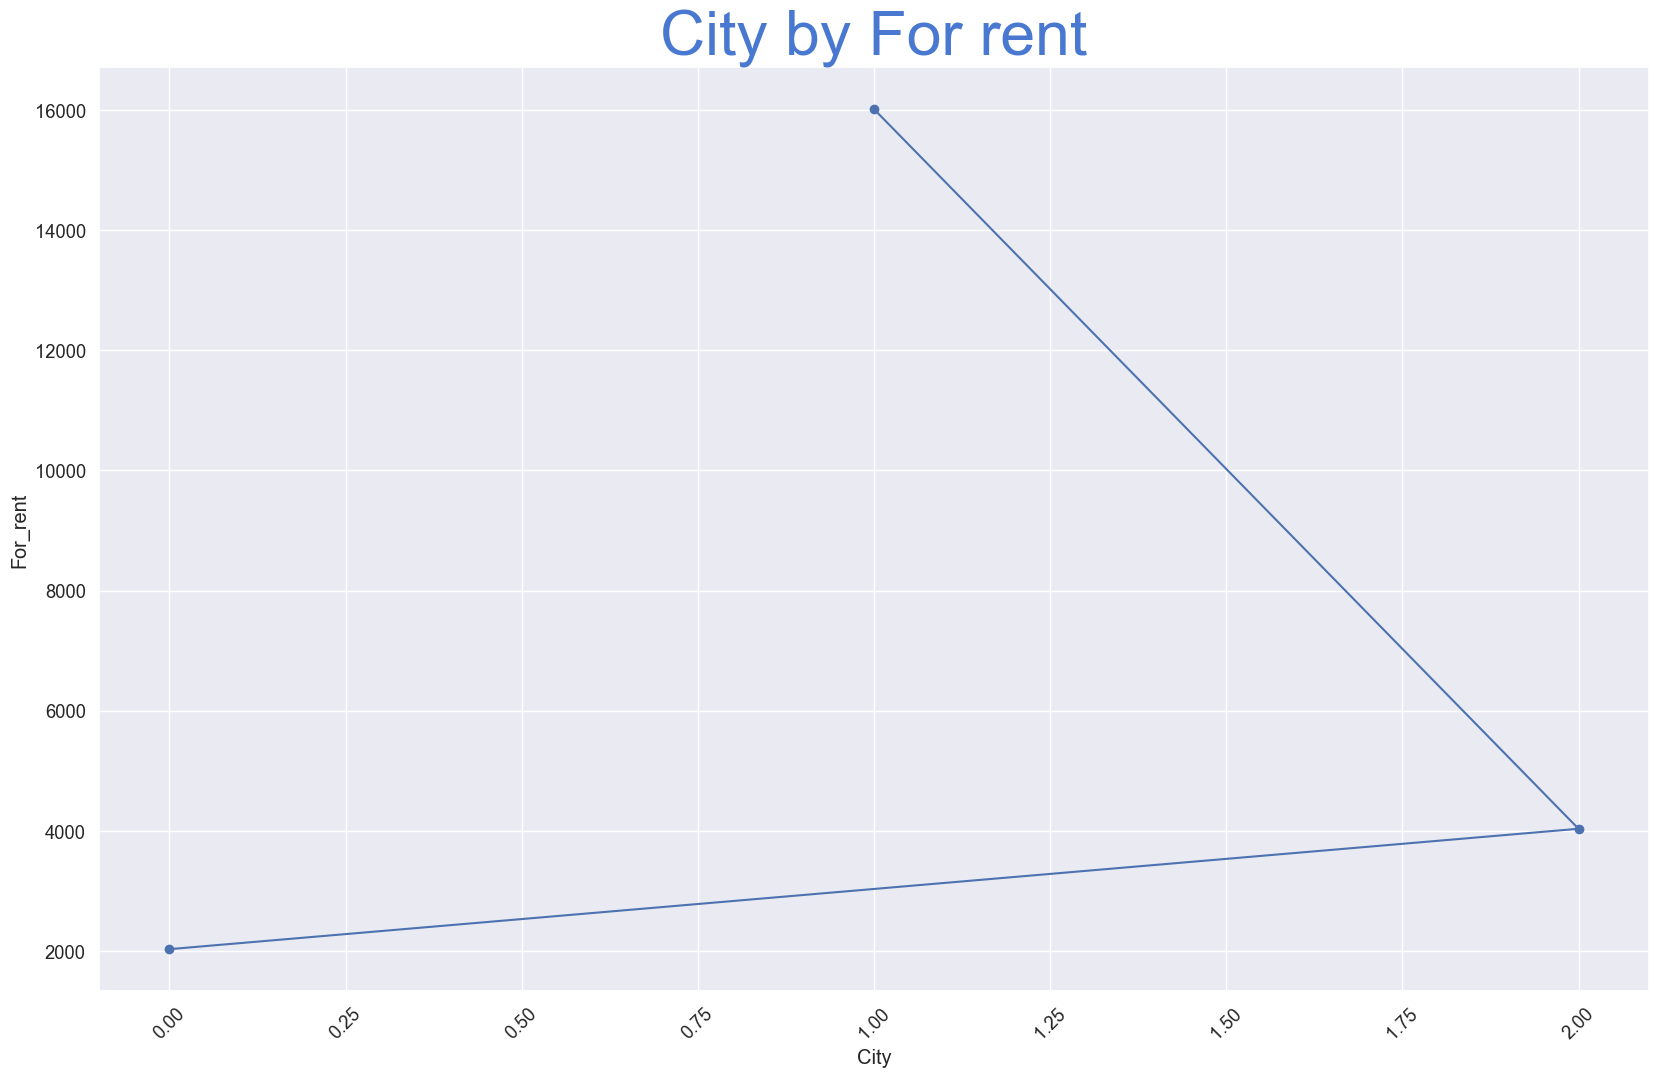

In [83]:
City=df_no_outliers['City'].value_counts()
plt.plot(City,'o-')
plt.xticks(rotation=45)
plt.title("City by For rent",fontsize=45,color='b')
plt.xlabel("City")
plt.ylabel("For_rent")
plt.show()

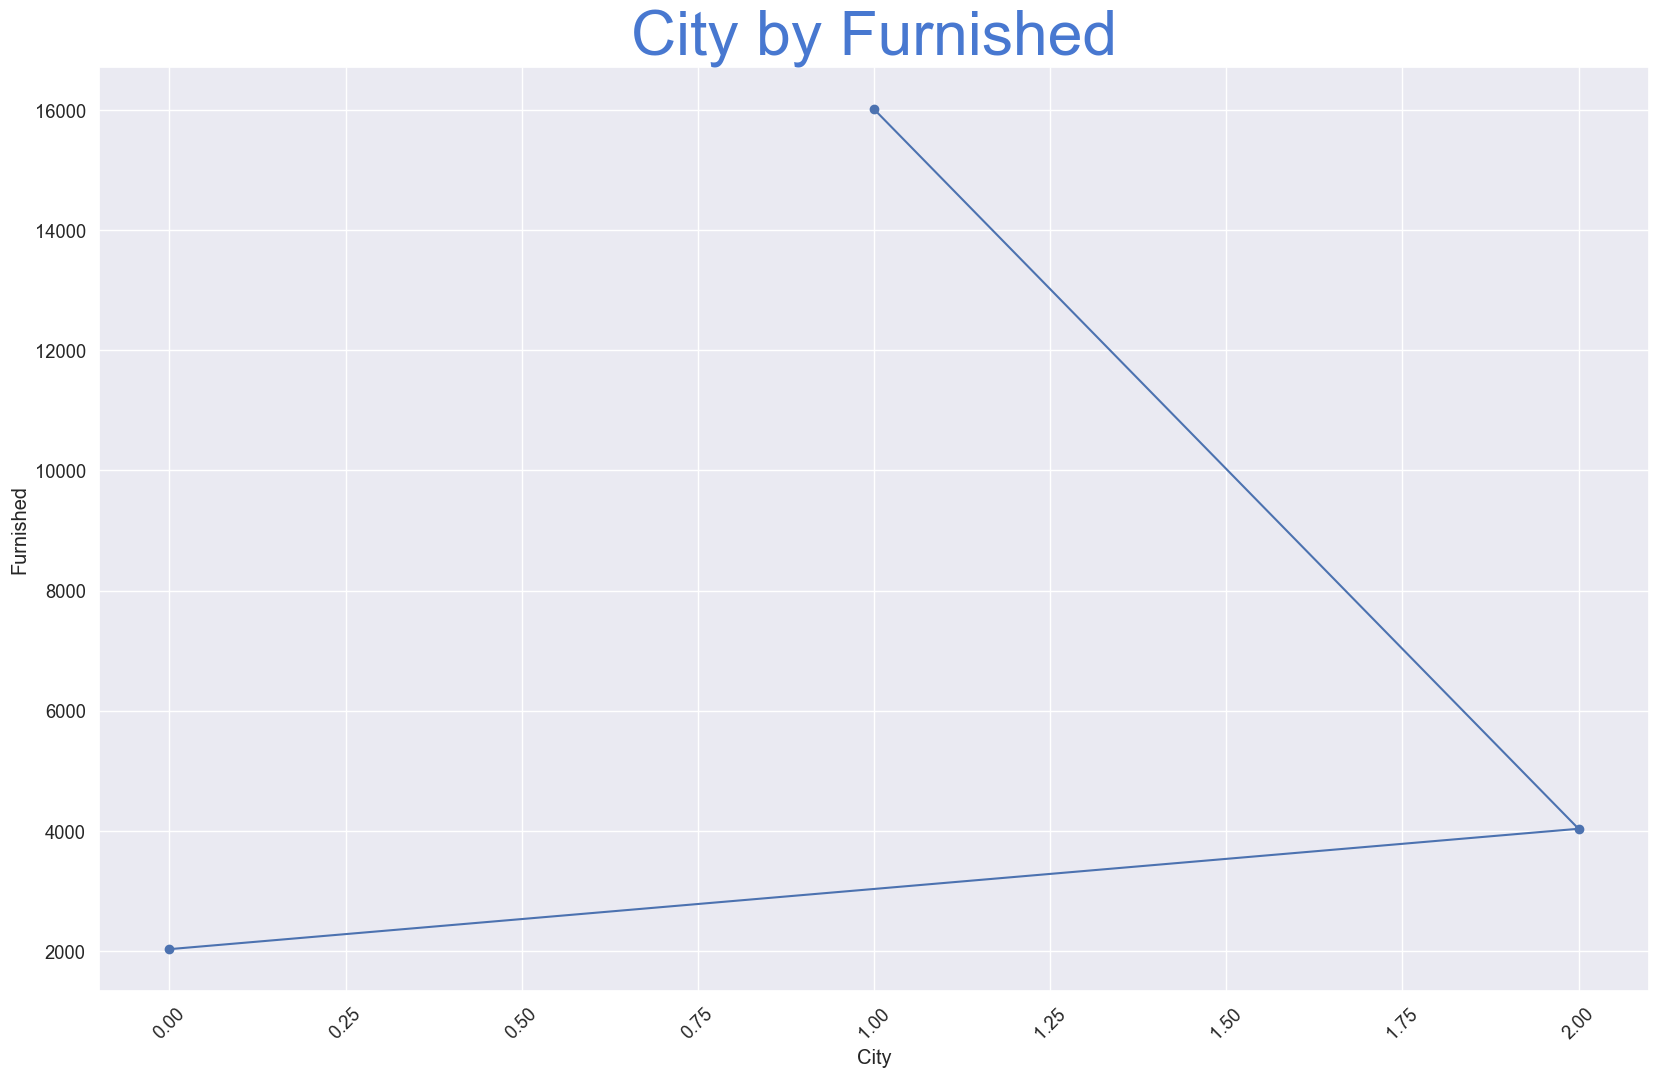

In [84]:
City=df_no_outliers['City'].value_counts()
plt.plot(City,'o-')
plt.xticks(rotation=45)
plt.title("City by Furnished",fontsize=45,color='b')
plt.xlabel("City")
plt.ylabel("Furnished")
plt.show()

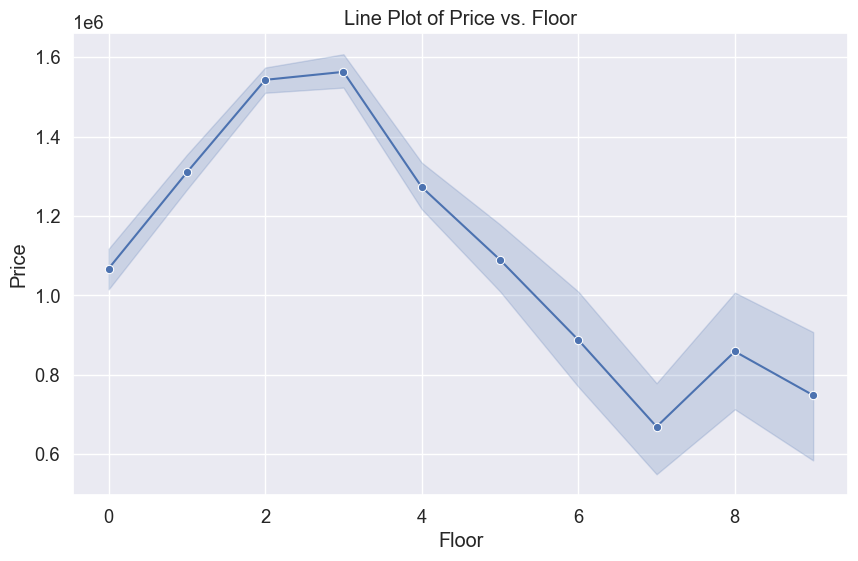

In [85]:
# Ensure 'Floor' and 'Price' are numeric
df_no_outliers['Floor'] = pd.to_numeric(df_no_outliers['Floor'], errors='coerce')
df_no_outliers['Price'] = pd.to_numeric(df_no_outliers['Price'], errors='coerce')

# Drop rows with NaN values in 'Floor' or 'Price'
#data_cleaned = data_cleaned.dropna(subset=['Floor', 'Price'])

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Floor', y='Price', data=df_no_outliers, marker='o')
plt.title('Line Plot of Price vs. Floor')
plt.xlabel('Floor')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [86]:
le_city = LabelEncoder()
le_region = LabelEncoder()
df_no_outliers['City'] = le_city.fit_transform(df_no_outliers['City'])
df_no_outliers['Region'] = le_region.fit_transform(df_no_outliers['Region'])

In [87]:
df_no_outliers

,House_Type,Size,Bedrooms,Bathrooms,Floor,Furnished,For_rent,Region,City,Price
0,Apartment,170,3,2,9,No,No,74,1,1546400
1,Apartment,104,2,1,7,No,No,53,1,950000
2,Apartment,160,3,2,1,No,No,51,1,2100000
3,Apartment,160,3,3,0,No,No,54,1,3994232
4,Apartment,145,3,2,3,No,No,54,1,370000
...,...,...,...,...,...,...,...,...,...,...
23342,Apartment,134,2,2,1,No,Yes,68,1,9000
23343,Duplex,176,3,3,0,No,Yes,68,1,15000
23344,Apartment,70,2,1,0,Yes,Yes,57,1,3500
23345,Apartment,115,3,1,2,No,Yes,57,1,2800


In [106]:
X = df_no_outliers[['Region', 'City', 'Size', 'Bedrooms', 'Bathrooms', 'Floor']]
y = df_no_outliers['Price']

In [107]:
# 4. تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
X_train

,Region,City,Size,Bedrooms,Bathrooms,Floor
1740,55,1,200,3,3,1
15400,60,1,350,3,3,4
9529,54,1,180,3,2,2
377,54,1,207,3,2,4
5537,54,1,188,3,3,1
...,...,...,...,...,...,...
12532,54,1,160,3,2,2
22719,75,1,150,2,3,4
5644,55,1,250,4,2,1
896,24,2,110,2,2,1


In [109]:
X_test

,Region,City,Size,Bedrooms,Bathrooms,Floor
18335,54,1,204,3,3,2
12998,54,1,166,2,2,4
3296,42,1,100,2,2,4
4736,52,0,120,2,1,1
18239,55,1,130,3,2,2
...,...,...,...,...,...,...
18013,60,1,110,2,2,4
14228,55,1,173,3,3,2
1323,42,1,143,3,2,1
22509,52,0,130,3,1,5


In [110]:
y_train

1740     2100000
15400    3500000
9529      412000
377      2000000
5537     4850000
          ...   
12532    1870000
22719     107000
5644     2600000
896       450000
16571     950000
Name: Price, Length: 17660, dtype: int64

In [111]:
y_test

18335    4500000
12998    3250000
3296        9500
4736      325000
18239     870000
          ...   
18013    1950000
14228    2533000
1323       11000
22509     290000
16181    2800000
Name: Price, Length: 4416, dtype: int64

In [112]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [113]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.14305858844379216
MAE: 985572.9694182588
RMSE: 1283717.77253483


In [ ]:
# 9. دالة التنبؤ
def predict_price(region_name, city_name, size, bedrooms, bathrooms, floor):
    city_encoded = le_city.transform([city_name])[0]
    region_encoded = le_region.transform([region_name])[0]
    features = [[region_encoded, city_encoded, size, bedrooms, bathrooms, floor]]
    prediction = model.predict(features)[0]
    return prediction

# 10. إدخال المستخدم
print("\n📥 أدخل بيانات العقار:")
region = input("المنطقة (Region): ")
city = input("المدينة (City): ")
size = float(input("المساحة بالمتر (Size): "))
bedrooms = int(input("عدد غرف النوم (Bedrooms): "))
bathrooms = int(input("عدد الحمامات (Bathrooms): "))
floor = int(input("الطابق (Floor): "))

# التنبؤ بالسعر
try:
    predicted_price = predict_price(region, city, size, bedrooms, bathrooms, floor)
    print(f"\n✅ السعر المتوقع للعقار في {city}, {region} هو: {predicted_price:.2f}")
except ValueError as e:
    print(f"\n❌ خطأ: {e}")
    print("تأكد أن أسماء المدينة والمنطقة مطابقة تمامًا لما هو موجود في البيانات.")



📥 أدخل بيانات العقار:
